# DSCI 100 – Individual Planning Report  
**Name:** Jaime Lucas  
**Student ID:** 19849298  
**Project:** Predicting Usage of a Video Game Research Server  
Group: 3


In [20]:
library(readr)
library(dplyr)
library(tidyverse)
players <- read_csv("players.csv")
head(players)
nrow(players)
ncol(players)
glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [21]:
sessions <- read_csv("sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## (1) Data Description  

This project uses data collected from a UBC Computer Science research Minecraft server.  
The dataset records how players interact with the world and tracks when, how long, and how frequently they play.  
It consists of two files:

- **players.csv** – describes each individual player and their characteristics.  
- **sessions.csv** – logs every recorded gameplay session linked to those players.  

### players.csv  
This dataset contains one row per unique player. It includes demographic and behavioural variables such as experience level, gender, age, and total hours played.  

| Variable | Type | Description |  
|-----------|------|-------------|  
| **experience** | Character | Player’s self-reported gaming experience (e.g., *Amateur*, *Regular*, *Pro*, *Veteran*). |  
| **subscribe** | Logical | Indicates whether the player subscribed to the project’s newsletter (`TRUE`/`FALSE`). |  
| **hashedEmail** | Character | Anonymized player email identifier used to link with `sessions.csv`. |  
| **played_hours** | Numeric | Total hours the player spent on the Minecraft server. |  
| **name** | Character | Player’s chosen display name. |  
| **gender** | Character | Player’s reported gender. |  
| **Age** | Numeric | Player’s age in years. |  

There are a total of 196 observations (players) and 7 variables.  
From an initial standpoint, the **played_hours** variable is highly skewed, with many players recording few hours and a small group contributing heavily.  
A few entries also report `0` played hours, indicating players who may have registered but never spent time (or for less than 1 hour) actively joined in the game.  

Potential data quality issues include missing values for demographic variables, inconsistencies in time formatting, and potential outliers in session durations.    I focus primarily on **players.csv** because it contains the total playtime measure needed to address my research question.


In [22]:
players_means <- players |>
  summarise(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))
players_means

players_summary <- players |> 
  summarise(across(where(is.numeric), 
                   list(mean = ~round(mean(.x, na.rm = TRUE), 2),
                        sd   = ~round(sd(.x, na.rm = TRUE), 2),
                        min  = ~round(min(.x, na.rm = TRUE), 2),
                        max  = ~round(max(.x, na.rm = TRUE), 2))))
players_summary


played_hours,Age
<dbl>,<dbl>
5.85,21.14


played_hours_mean,played_hours_sd,played_hours_min,played_hours_max,Age_mean,Age_sd,Age_min,Age_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,28.36,0,223.1,21.14,7.39,9,58


## (2) Questions  

**Broad Question:**  
Which kinds of players are most likely to contribute a large amount of data to the server?  

**Specific Question:**  
Can a player's experience level and age help predict their total played hours on the minecraft server?

**Rationale:**  
This question is predictive and well suited for multivariable linear regression, where played_hours is the numerical response. Before modeling, the data will require cleaning, including handling missing values, converting experience to a factor, and deciding how to treat the large number of zero-hour players, whose presence may distort model assumptions.

(3) Exploratory Data Analysis and Visualization


In [23]:
play_frequency <- sessions |>
  group_by(hashedEmail) |>
  summarise(num_sessions = n())
players <- players |>
  left_join(play_frequency, by = "hashedEmail")
head(players)


experience,subscribe,hashedEmail,played_hours,name,gender,Age,num_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA


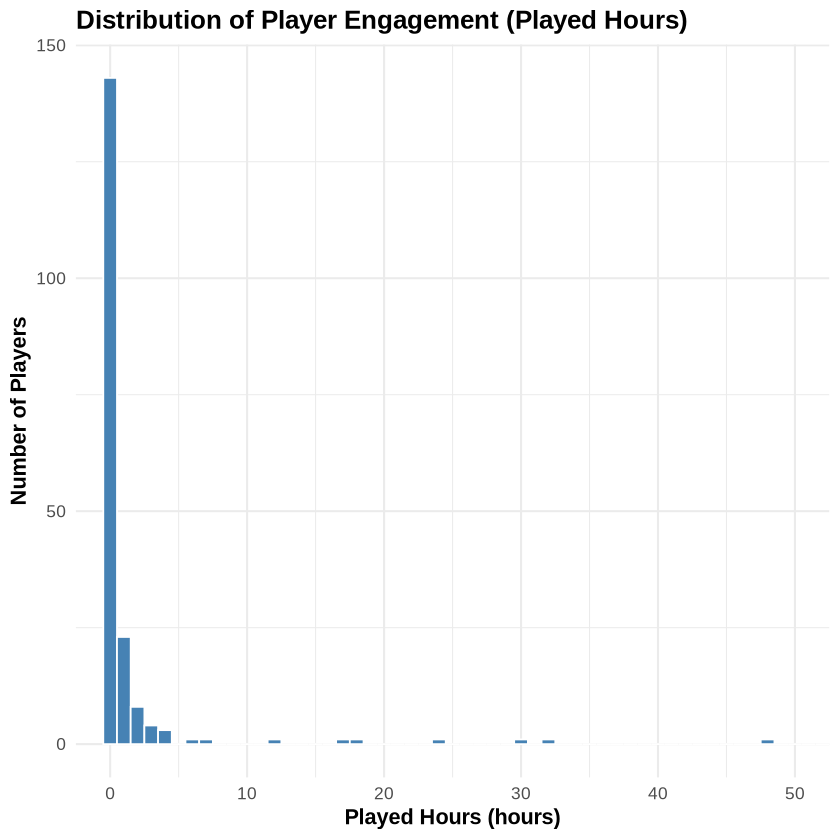

In [24]:
ggplot(players, aes(x = played_hours)) +
  geom_histogram(
    binwidth = 1,
    fill = "#4682B4",  
    color = "white"
  ) +
  labs(
    title = "Distribution of Player Engagement (Played Hours)",
    x = "Played Hours (hours)",
    y = "Number of Players"
  ) +
  coord_cartesian(xlim = c(0, 50)) +  
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.title = element_text(face = "bold")
  )


    

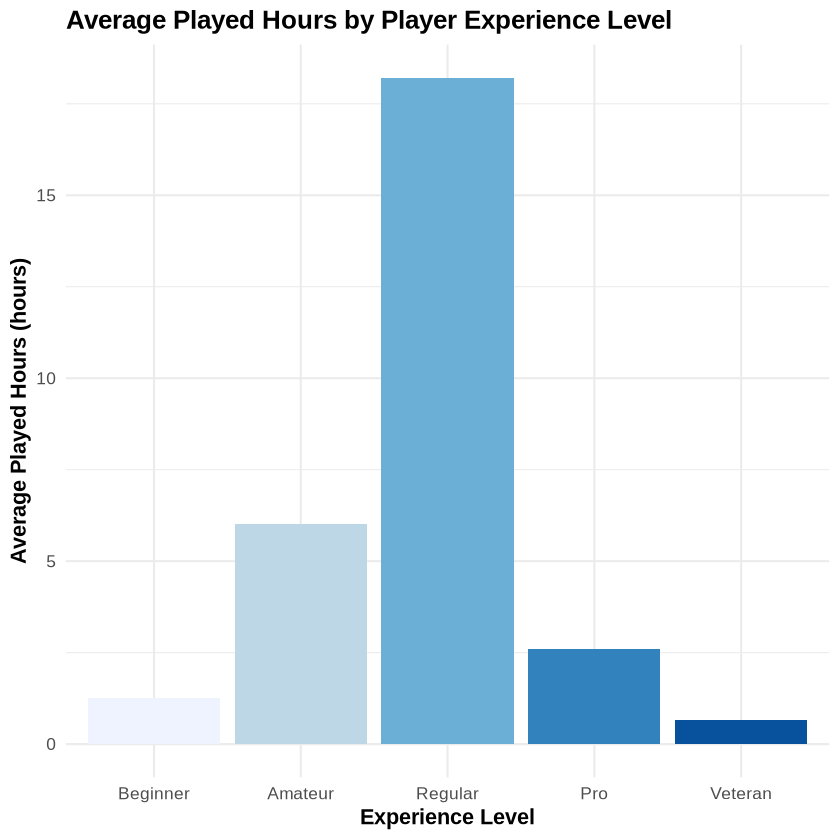

In [25]:

avg_hours <- players |>
  mutate(
    experience = factor(
      experience,
      levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")
    )
  ) |>
  group_by(experience) |>
  summarize(mean_hours = mean(played_hours, na.rm = TRUE))

ggplot(avg_hours, aes(x = experience, y = mean_hours, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Average Played Hours by Player Experience Level",
    x = "Experience Level",
    y = "Average Played Hours (hours)"
  ) +
  scale_fill_brewer(palette = "Blues") +
  theme_minimal(base_size = 13) +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold"),
    plot.subtitle = element_text(size = 11),
    axis.title = element_text(face = "bold")
  )



Insights from the Visualizations

The histogram of played_hours shows an extremely right-skewed distribution: most players record near-zero hours, while only a small minority play extensively (20–50+ hours). This indicates highly uneven engagement, dominated by a few very active users.

The bar plot comparing mean played hours across experience levels shows clear differences. Regular players log the highest average playtime by a wide margin, while Beginners, Amateurs, Veterans, and Pros play far less on average. This suggests experience level is associated with engagement, though large within-group variation remains.

Overall, the visualizations indicate that experience level likely contributes to predicting total playtime, but the heavy skew and presence of outliers may complicate modelling and should be addressed in later steps.

(4) Methods and Plan

To answer whether experience and age predict total played hours, I will use a multivariable linear regression model, which is appropriate for a numeric response and provides interpretable coefficients. The model will estimate how played_hours changes when moving between experience levels or increasing age, holding the other variable constant.

Before fitting the model, I will:

1. Remove observations with missing age or played_hours.

2. Convert experience into an ordered factor.

3. Assess whether zero-hour players should be filtered out or modeled separately.

4. Check for extreme outliers that may  influence results.

After fitting the model, I will examine residual plots to evaluate linearity, constant variance, and influential points. For evaluation, I will split the data into training (≈75%) and testing (≈25%) sets using tidymodels, fit linear_reg(engine = "lm"), and compute RMSE/RMSPE on the test set.

In the later group phase, we can compare this linear regression model to a K-NN regression model on the same split and choose the method with the lower test error or better interpretability.